<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [2]:
#Carga desde un archivo .xlsx sin indice
Barcelona= pd.read_csv("Barcelona(Cataluña).csv", encoding="latin1")

In [3]:
#Verificamos información del DataFrame
Barcelona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  18927 non-null  object 
 1   source                                        18927 non-null  object 
 2   name                                          18927 non-null  object 
 3   description                                   18189 non-null  object 
 4   neighborhood_overview                         9154 non-null   object 
 5   host_id                                       18927 non-null  int64  
 6   host_name                                     18924 non-null  object 
 7   host_since                                    18924 non-null  object 
 8   host_location                                 14551 non-null  object 
 9   host_about                                    12152 non-null 

**Determinación de Clases para datos agrupados**


In [4]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [5]:
#Corroboramos valores nulos
valores_nulos=Barcelona.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       738
neighborhood_overview                            9773
host_id                                             0
host_name                                           3
host_since                                          3
host_location                                    4376
host_about                                       6775
host_response_time                               2890
host_response_rate                               2890
host_acceptance_rate                             2744
host_is_superhost                                 567
host_neighbourhood                               9776
host_listings_count                                 3
host_total_listings_count                           3
host_verifications                                  3
host_has_profile_pic        

In [6]:
#Calculamos el numero total de la población "n"
Barcelona['reviews_per_month']. info()
n=18927

<class 'pandas.core.series.Series'>
RangeIndex: 18927 entries, 0 to 18926
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
13929 non-null  float64
dtypes: float64(1)
memory usage: 148.0 KB


In [7]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Barcelona['reviews_per_month'].max()
Min=Barcelona['reviews_per_month'].min()
Limites= [Min, Max]
Limites

[0.01, 74.79]

In [8]:
#Calculamos el rango R
R=Max-Min
R

74.78

In [9]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(18927)
ni

15.199911516657144

In [10]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

4.919765481401043

**Creación de Categorias a partir de clases**

In [11]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(0, 74.8, 16)
intervalos

array([ 0.        ,  4.98666667,  9.97333333, 14.96      , 19.94666667,
       24.93333333, 29.92      , 34.90666667, 39.89333333, 44.88      ,
       49.86666667, 54.85333333, 59.84      , 64.82666667, 69.81333333,
       74.8       ])

In [12]:
#Creamos las categorías 
categorias= ["Categoría1 (0-4.9 reviews_per_month)", "Categoría2 (5-9.9 reviews_per_month)","Categoría3 (10-14.96 reviews_per_month)", "Categoría4 (14.97-19.94 reviews_per_month)",
             "Categoría5 (19.95-24.93 reviews_per_month)", "Categoría6 (24.94-29.92 reviews_per_month)","Categoría7 (29.93-34.90 reviews_per_month)", "Categoría8 (34.91-39.89 reviews_per_month)", "Categoría9 (39.90-44.88 reviews_per_month)", "Categoría10 (44.89-49.86 reviews_per_month)","Categoría11 (49.87-54.85 reviews_per_month)", "Categoría12 (54.86-59.84 reviews_per_month)",
             "Categoría13 (59.85-64.82 reviews_per_month)", "Categoría14 (64.83-69.81 reviews_per_month)","Categoría15 (69.82-74.8 reviews_per_month)"
             ]

In [13]:
#Finalmente creamos las categorías en la columna numérica
Barcelona['reviews_per_month']=pd.cut(x= Barcelona['reviews_per_month'], bins=intervalos, labels= categorias)
Barcelona['reviews_per_month']

0               Categoría1 (0-4.9 reviews_per_month)
1               Categoría1 (0-4.9 reviews_per_month)
2               Categoría1 (0-4.9 reviews_per_month)
3               Categoría1 (0-4.9 reviews_per_month)
4               Categoría1 (0-4.9 reviews_per_month)
5               Categoría1 (0-4.9 reviews_per_month)
6               Categoría1 (0-4.9 reviews_per_month)
7               Categoría1 (0-4.9 reviews_per_month)
8               Categoría1 (0-4.9 reviews_per_month)
9               Categoría1 (0-4.9 reviews_per_month)
10              Categoría1 (0-4.9 reviews_per_month)
11              Categoría1 (0-4.9 reviews_per_month)
12              Categoría1 (0-4.9 reviews_per_month)
13              Categoría1 (0-4.9 reviews_per_month)
14              Categoría1 (0-4.9 reviews_per_month)
15              Categoría1 (0-4.9 reviews_per_month)
16              Categoría1 (0-4.9 reviews_per_month)
17              Categoría1 (0-4.9 reviews_per_month)
18              Categoría1 (0-4.9 reviews_per_

In [14]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Barcelona['reviews_per_month'].value_counts().reset_index()
Tabla_freq

reviews_per_month  count
0          Categoría1 (0-4.9 reviews_per_month)  13371
1          Categoría2 (5-9.9 reviews_per_month)    482
2       Categoría3 (10-14.96 reviews_per_month)     48
3    Categoría4 (14.97-19.94 reviews_per_month)     16
4    Categoría5 (19.95-24.93 reviews_per_month)      6
5    Categoría15 (69.82-74.8 reviews_per_month)      2
6    Categoría6 (24.94-29.92 reviews_per_month)      1
7    Categoría7 (29.93-34.90 reviews_per_month)      1
8    Categoría9 (39.90-44.88 reviews_per_month)      1
9   Categoría12 (54.86-59.84 reviews_per_month)      1
10   Categoría8 (34.91-39.89 reviews_per_month)      0
11  Categoría10 (44.89-49.86 reviews_per_month)      0
12  Categoría11 (49.87-54.85 reviews_per_month)      0
13  Categoría13 (59.85-64.82 reviews_per_month)      0
14  Categoría14 (64.83-69.81 reviews_per_month)      0

In [15]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

reviews_per_month  count
0         Categoría1 (0-4.9 reviews_per_month)  13371
1         Categoría2 (5-9.9 reviews_per_month)    482
2      Categoría3 (10-14.96 reviews_per_month)     48
3   Categoría4 (14.97-19.94 reviews_per_month)     16
4   Categoría5 (19.95-24.93 reviews_per_month)      6
5   Categoría15 (69.82-74.8 reviews_per_month)      2
6   Categoría6 (24.94-29.92 reviews_per_month)      1
7   Categoría7 (29.93-34.90 reviews_per_month)      1
8   Categoría9 (39.90-44.88 reviews_per_month)      1
9  Categoría12 (54.86-59.84 reviews_per_month)      1

In [16]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('reviews_per_month')
Filtro_index

count
reviews_per_month                                 
Categoría1 (0-4.9 reviews_per_month)         13371
Categoría2 (5-9.9 reviews_per_month)           482
Categoría3 (10-14.96 reviews_per_month)         48
Categoría4 (14.97-19.94 reviews_per_month)      16
Categoría5 (19.95-24.93 reviews_per_month)       6
Categoría15 (69.82-74.8 reviews_per_month)       2
Categoría6 (24.94-29.92 reviews_per_month)       1
Categoría7 (29.93-34.90 reviews_per_month)       1
Categoría9 (39.90-44.88 reviews_per_month)       1
Categoría12 (54.86-59.84 reviews_per_month)      1

Text(0, 0.5, 'Frecuencia')

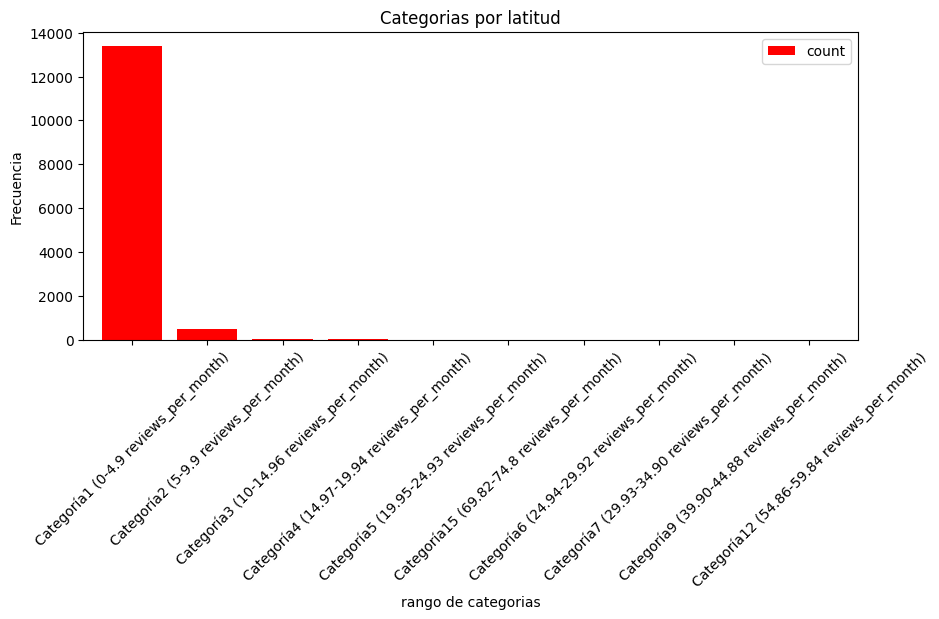

In [17]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')